<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Independent Practice: Grouping Data with `pandas`

_Authors: Kiefer Katovich (SF), Dave Yerrington (SF), Mario Carrillo (SF)_

---

You are going to investigate UFO sightings around the United States. This lab will give you practice performing `.groupby()` operations to split data along multiple dimensions. You'll also investigate patterns between subsets of the data using basic aggregation.


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Load and print the header for the UFO data.

In [19]:
ufo_csv = '../datasets/ufo.csv'

In [20]:
ufo = pd.read_csv(ufo_csv)

In [21]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 2. How many null values exist per column?

In [22]:
ufo.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

In [23]:
ufo.shape

(80543, 5)

#### 3. Which city has the most observations?

In [24]:
ufo.groupby('City')\
   .size()\
   .sort_values(ascending=False)\
   .head(10)

City
Seattle          646
New York City    612
Phoenix          533
Las Vegas        442
Portland         438
Los Angeles      416
San Diego        401
Houston          340
Chicago          337
Miami            279
dtype: int64

#### 4. What is the observation count per shape?

In [25]:
ufo['Shape Reported'].value_counts().head()

LIGHT       16332
TRIANGLE     7816
CIRCLE       7725
FIREBALL     6249
OTHER        5506
Name: Shape Reported, dtype: int64

In [26]:
ufo.groupby('Shape Reported')\
   .size()\
   .sort_values(ascending=False)\
   .head()

Shape Reported
LIGHT       16332
TRIANGLE     7816
CIRCLE       7725
FIREBALL     6249
OTHER        5506
dtype: int64

#### 5. Create a subset of the data that contains the top five cities and the top five shapes.

In [27]:
ufo['City'].value_counts().head(5)

Seattle          646
New York City    612
Phoenix          533
Las Vegas        442
Portland         438
Name: City, dtype: int64

In [28]:
ufo['City'].value_counts().head(5).values.tolist()

[646, 612, 533, 442, 438]

In [29]:
ufo.head().values

array([['Ithaca', nan, 'TRIANGLE', 'NY', '6/1/1930 22:00'],
       ['Willingboro', nan, 'OTHER', 'NJ', '6/30/1930 20:00'],
       ['Holyoke', nan, 'OVAL', 'CO', '2/15/1931 14:00'],
       ['Abilene', nan, 'DISK', 'KS', '6/1/1931 13:00'],
       ['New York Worlds Fair', nan, 'LIGHT', 'NY', '4/18/1933 19:00']],
      dtype=object)

In [30]:
ufo['City'].value_counts().head(5).index.values

array(['Seattle', 'New York City', 'Phoenix', 'Las Vegas', 'Portland'],
      dtype=object)

In [31]:
ufo['City'].value_counts().head(5).index.values.tolist()

['Seattle', 'New York City', 'Phoenix', 'Las Vegas', 'Portland']

In [32]:
ufo['Shape Reported'].value_counts().head(5).index.values.tolist()

['LIGHT', 'TRIANGLE', 'CIRCLE', 'FIREBALL', 'OTHER']

In [33]:
cities = ['Seattle','New York City','Phoenix','Las Vegas','Portland']
shapes = ['LIGHT','TRIANGLE','CIRCLE','FIREBALL','OTHER']
subset = ufo[(ufo['City'].isin(cities)) & (ufo['Shape Reported'].isin(shapes))]

In [35]:
print(ufo.shape)
print(subset.shape)

(80543, 5)
(1322, 5)


#### 6. Using this subset, find the percent of each shape seen in each city.

In [36]:
counts = subset.groupby(['City','Shape Reported']).size()
counts

City           Shape Reported
Las Vegas      CIRCLE             42
               FIREBALL           22
               LIGHT              85
               OTHER              36
               TRIANGLE           31
New York City  CIRCLE             56
               FIREBALL           35
               LIGHT             105
               OTHER              42
               TRIANGLE           40
Phoenix        CIRCLE             34
               FIREBALL           35
               LIGHT             106
               OTHER              46
               TRIANGLE           45
Portland       CIRCLE             46
               FIREBALL           29
               LIGHT             100
               OTHER              29
               TRIANGLE           27
Seattle        CIRCLE             50
               FIREBALL           55
               LIGHT             129
               OTHER              51
               TRIANGLE           46
dtype: int64

In [37]:
counts = counts.reset_index()
counts.columns = ['city','shape','count'] #rename the third column
counts

,city,shape,count
0,Las Vegas,CIRCLE,42
1,Las Vegas,FIREBALL,22
2,Las Vegas,LIGHT,85
3,Las Vegas,OTHER,36
4,Las Vegas,TRIANGLE,31
5,New York City,CIRCLE,56
6,New York City,FIREBALL,35
7,New York City,LIGHT,105
8,New York City,OTHER,42
9,New York City,TRIANGLE,40


In [38]:
counts['percent'] = counts.groupby('city')['count']\
                          .apply(lambda x: x/np.sum(x))

In [39]:
counts

,city,shape,count,percent
0,Las Vegas,CIRCLE,42,0.194444
1,Las Vegas,FIREBALL,22,0.101852
2,Las Vegas,LIGHT,85,0.393519
3,Las Vegas,OTHER,36,0.166667
4,Las Vegas,TRIANGLE,31,0.143519
5,New York City,CIRCLE,56,0.201439
6,New York City,FIREBALL,35,0.125899
7,New York City,LIGHT,105,0.377698
8,New York City,OTHER,42,0.151079
9,New York City,TRIANGLE,40,0.143885


**7. Make a grouped bar chart with your subset data showing counts of shapes seen by city.**

In [40]:
subset.groupby(['City','Shape Reported']).size().unstack()

Shape Reported,CIRCLE,FIREBALL,LIGHT,OTHER,TRIANGLE
City,,,,,
Las Vegas,42,22,85,36,31
New York City,56,35,105,42,40
Phoenix,34,35,106,46,45
Portland,46,29,100,29,27
Seattle,50,55,129,51,46


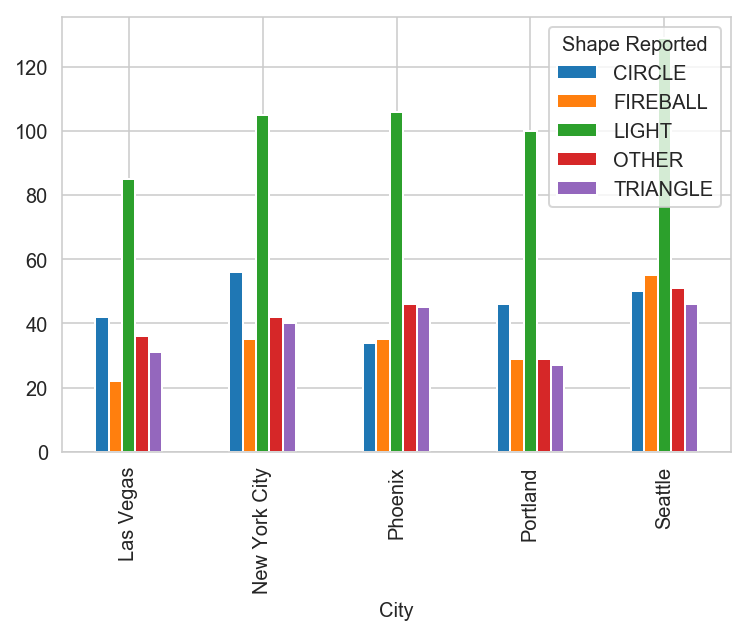

In [41]:
subset.groupby(['City','Shape Reported']).size().unstack().plot(kind='bar')